In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('train.csv',usecols=['GarageQual','FireplaceQu','SalePrice'])

In [3]:
df.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

Text(0, 0.5, 'Number of Houses')

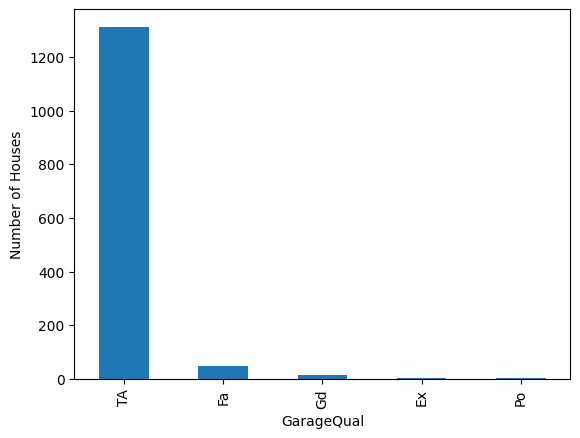

In [5]:
df['GarageQual'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('GarageQual')
plt.ylabel('Number of Houses')

In [6]:
df['GarageQual'].mode()

0    TA
Name: GarageQual, dtype: object

Text(0.5, 1.0, 'GarageQual')

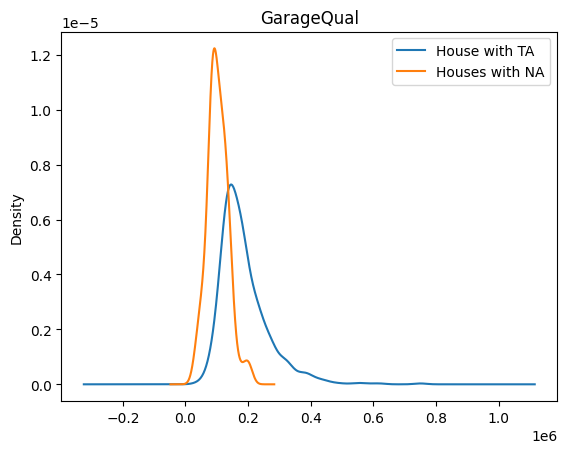

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111)

df[df['GarageQual']=='TA']['SalePrice'].plot(kind='kde' , ax=ax)

df[df['GarageQual'].isnull()]['SalePrice'].plot(kind='kde', ax=ax)

lines,label = ax.get_legend_handles_labels()
labels = ['House with TA','Houses with NA']
ax.legend(lines,labels,loc='best')

plt.title('GarageQual')

In [10]:
temp = df[df['GarageQual']=='TA']['SalePrice']

In [12]:
df['GarageQual'].fillna('TA',inplace=True)

<Axes: >

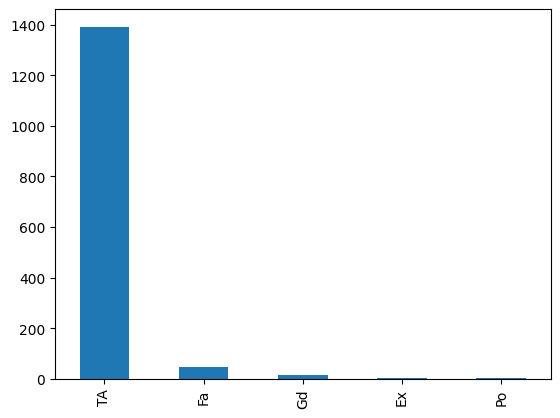

In [13]:
df['GarageQual'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'GarageQual')

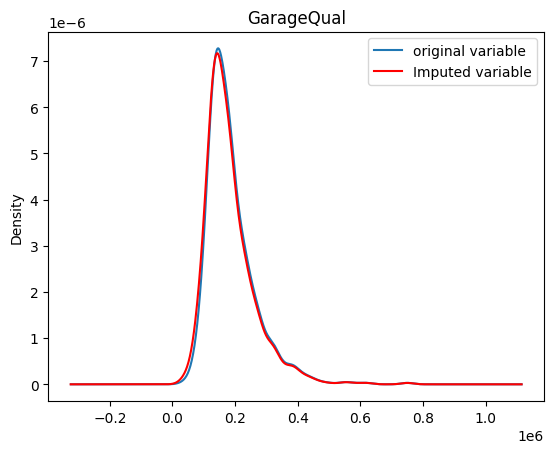

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111)

temp.plot(kind='kde', ax=ax)

df[df['GarageQual'] == 'TA']['SalePrice'].plot(kind='kde',ax=ax,color='red')

lines,labels=ax.get_legend_handles_labels() 
labels = ['original variable','Imputed variable']
ax.legend(lines,labels,loc='best')

plt.title('GarageQual')

<Axes: >

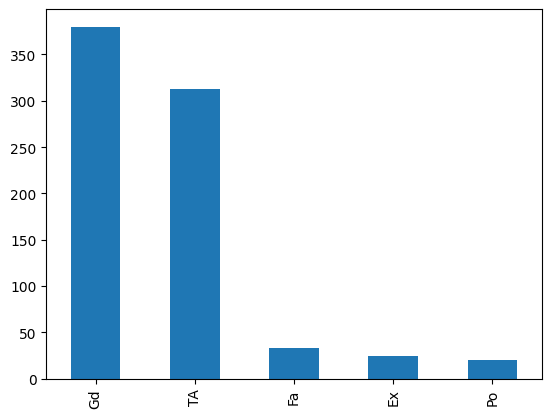

In [15]:
df['FireplaceQu'].value_counts().plot(kind='bar')

In [16]:
df['FireplaceQu'].mode()

0    Gd
Name: FireplaceQu, dtype: object

Text(0.5, 1.0, 'FireplaceQu')

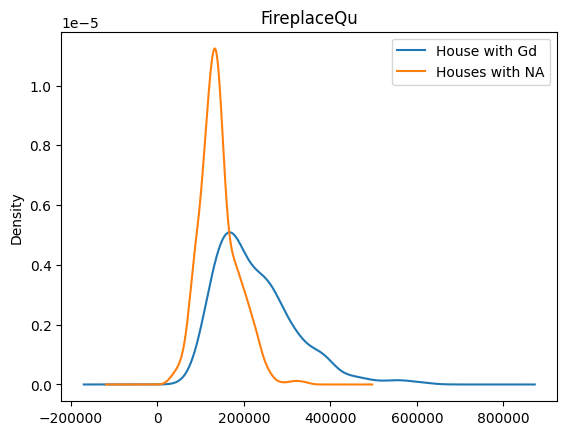

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111)

df[df['FireplaceQu']=='Gd']['SalePrice'].plot(kind='kde' , ax=ax)

df[df['FireplaceQu'].isnull()]['SalePrice'].plot(kind='kde', ax=ax)

lines,label = ax.get_legend_handles_labels()
labels = ['House with Gd','Houses with NA']
ax.legend(lines,labels,loc='best')

plt.title('FireplaceQu')

In [19]:
temp1 = df[df['FireplaceQu']=='TA']['SalePrice']

In [21]:
df['FireplaceQu'].fillna('Gd',inplace=True)

<Axes: >

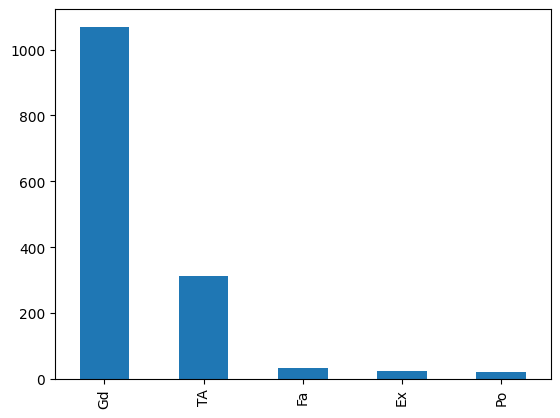

In [22]:
df['FireplaceQu'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'FirepleaseQu')

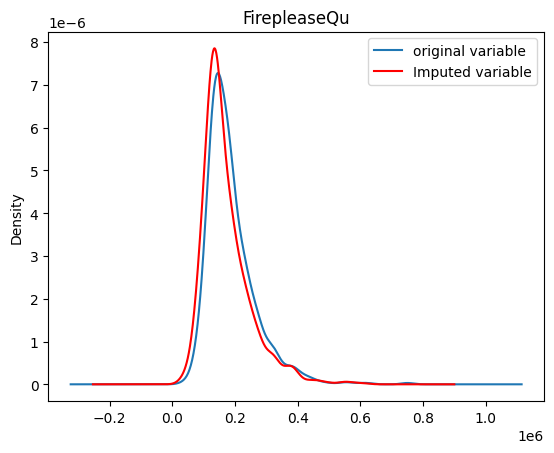

In [24]:
fig = plt.figure()
ax = fig.add_subplot(111)

temp.plot(kind='kde', ax=ax)

df[df['FireplaceQu'] == 'Gd']['SalePrice'].plot(kind='kde',ax=ax,color='red')

lines,labels=ax.get_legend_handles_labels() 
labels = ['original variable','Imputed variable']
ax.legend(lines,labels,loc='best')

plt.title('FirepleaseQu')

## Using Sklearn

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['SalePrice']),df['SalePrice'],test_size=0.2)

In [29]:
from sklearn.impute import SimpleImputer

In [31]:
imputer = SimpleImputer(strategy='most_frequent')

In [32]:
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [33]:
imputer.statistics_

array(['Gd', 'TA'], dtype=object)